In [131]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
oportunidad_compradores_2023 = pd.read_csv('data/out/oportunidad_compradores_2023.csv')

In [133]:
cambios_vs_oportunidad_clustering = pd.read_csv('data/out/cambios_vs_oportunidad_clustering.csv')

In [134]:
cambios_vs_oportunidad_clustering=pd.merge(cambios_vs_oportunidad_clustering, oportunidad_compradores_2023, on=['GRUPO_EDAD','ZONA','ESTRATO'], how='inner')

In [135]:
cambios_vs_oportunidad_clustering.groupby(['GRUPO_EDAD','ZONA','ESTRATO']).size().reset_index(name='counts')

,GRUPO_EDAD,ZONA,ESTRATO,counts
0,a,centro_sur_y_oriente,1,1
1,a,centro_sur_y_oriente,2,1
2,a,centro_sur_y_oriente,3,1
3,a,centro_sur_y_oriente,4,1
4,a,ciudad_de_mexico,2,1
...,...,...,...,...
150,g,occidente_y_bajio,4,1
151,g,sur,1,1
152,g,sur,2,1
153,g,sur,3,1


In [145]:
cambios_vs_oportunidad_clustering.sort_values(by=['FAC_PER_P7_19_2_x'], ascending=False)

,GRUPO_EDAD,ZONA,ESTRATO,FAC_PER_P7_19_2_x,total_increment,cluster,color,FAC_PER_P7_19_1,FAC_PER_P7_19_2_y,POBTOT
70,d,centro_sur_y_oriente,2,1998620.0,448468.0,0,red,998859.0,1998620.0,2997479.0
93,e,centro_sur_y_oriente,2,1922213.0,202893.0,0,red,506586.0,1922213.0,2428799.0
85,d,occidente_y_bajio,2,1344586.0,233066.0,0,red,599602.0,1344586.0,1944188.0
1,a,centro_sur_y_oriente,2,1284562.0,347107.0,0,red,1185173.0,1284562.0,2469735.0
108,e,occidente_y_bajio,2,1164157.0,173919.0,0,red,348018.0,1164157.0,1512175.0
...,...,...,...,...,...,...,...,...,...,...
52,c,ciudad_de_mexico,4,17027.0,49144.0,2,green,120478.0,17027.0,137505.0
45,b,sur,4,11759.0,15463.0,2,green,47330.0,11759.0,59089.0
22,a,sur,4,11218.0,14787.0,2,green,54345.0,11218.0,65563.0
68,c,sur,4,9457.0,-3998.0,2,green,26094.0,9457.0,35551.0


In [136]:
# Updating the grouped dataframe with sum of 'POBTOT' for each cluster
grouped_df = cambios_vs_oportunidad_clustering.groupby('cluster').agg({
    'total_increment': 'sum',
    'FAC_PER_P7_19_2_x': 'sum',
    'POBTOT': 'sum'
}).reset_index()


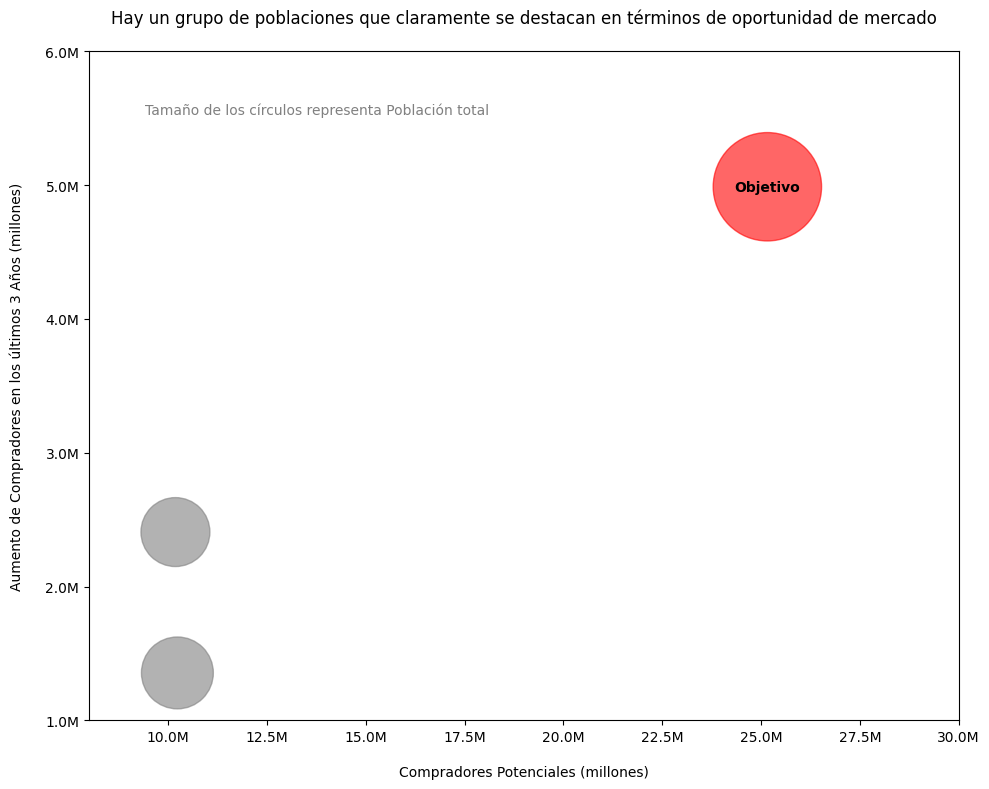

In [142]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Adjusting colors and axis limits to ensure the circles are fully visible
colors = ['gray', 'red', 'gray']  # Adding some distinct colors for each cluster

# Updating the grouped dataframe with the sum of 'POBTOT' for each cluster
grouped_df = cambios_vs_oportunidad_clustering.groupby('cluster').agg({
    'total_increment': 'sum',
    'FAC_PER_P7_19_2_x': 'sum',
    'POBTOT': 'sum'
}).reset_index()

# Custom formatter to display values in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'

# Plotting with updated requirements
plt.figure(figsize=(10, 8))
plt.scatter(
    grouped_df['FAC_PER_P7_19_2_x'], 
    grouped_df['total_increment'], 
    s=grouped_df['POBTOT'] * 0.00015,  # Adjusting size for visibility
    alpha=0.6, 
    color=colors  # Using distinct colors
)

# Adding labels for each cluster according to the new requirements
for i, row in grouped_df.iterrows():
    if row['cluster'] == 1:
        plt.text(row['FAC_PER_P7_19_2_x'], row['total_increment'], "Objetivo", ha='center', va='center', fontsize=10, fontweight='bold')

# Adding axis labels and title with note for size
plt.xlabel('Compradores Potenciales (millones)', labelpad=15)
plt.ylabel('Aumento de Compradores en los últimos 3 Años (millones)', labelpad=15)
plt.title('Hay un grupo de poblaciones que claramente se destacan en términos de oportunidad de mercado', pad=20)
plt.figtext(0.15, 0.85, "Tamaño de los círculos representa Población total", ha="left", fontsize=10, color="gray")

# Extending limits to ensure circles are fully visible
plt.xlim(8000000, 30000000)
plt.ylim(1000000, 6000000)

# Setting custom formatter for both axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Adjust layout for more space
plt.tight_layout()

plt.show()
